# Mini Lab 10: Multi-Dimensional Analysis

<a target="_blank" href="https://colab.research.google.com/github/browndw/humanities_analytics/blob/main/mini_labs/Mini_Lab_10_MultidimensionalAnalysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Multi-Dimensional Analysis (MDA)** is a corpus linguistics method for identifying systematic patterns of linguistic variation across texts. Rather than examining one feature at a time, MDA reveals how **bundles** of linguistic features co-occur to distinguish genres, registers, or text types.

## The MDA Workflow

1. **Identify relevant variables**: Select linguistic features (grammar, lexis, syntax) that might vary across texts
2. **Extract factors from variables**: Use factor analysis to find patterns of co-occurrence among features
3. **Functional interpretation of factors as dimensions**: Interpret what each factor represents (e.g., "narrative vs. informational")
4. **Placement of categories on dimensions**: Score texts along each dimension to classify and compare them

MDA is a specific application of **factor analysis**, a method for reducing complexity in linguistic data to identify underlying principles of systematic variation ([Biber 1992](https://books.google.com/books?id=acTLCgAAQBAJ&printsec=frontcover#v=onepage&q&f=false)).

## Case 1: Biber Tagger

### Why Tagged Features?

MDA requires a **minimum of 5 observations per variable** (ideally 10-20) for statistical stability. This generally precludes using simple word counts—a 500-document corpus with 10,000 unique words would violate this rule.

Instead, we use **tagged linguistic features** that aggregate words into functional categories. For example, instead of counting individual verbs, we count:
- Past tense verbs
- Present tense verbs
- Modal verbs
- Mental process verbs

### The Biber Tagger

For this lab, we'll use **pybiber**, which emulates Douglas Biber's classification system from his foundational register research. The package uses **spaCy** POS tagging and dependency parsing to identify and count **67 lexicogrammatical and functional features**.

These categories are described here: <https://browndw.github.io/pybiber/feature-categories.html>

Examples include:
- **Personal pronouns** (I, you, we)
- **Type-token ratio** (lexical diversity)
- **Nominalizations** (discussion, formation)
- **Passives** (was written, has been discussed)

### Install the libraries

Note that the capture decorator simply supresses the installation output.

In [ ]:
%%capture
!pip install pybiber

### Load the libraries

Let's import what we'll need to fetch the data, as well as analyze that data.

In [1]:
import polars as pl
import pybiber as pb
import spacy

### The Brown Corpus

The **Brown Corpus** (1961) was the first computer-readable corpus of American English. It contains 500 text samples (~2,000 words each) across 15 genres:

- Press (reportage, editorial, reviews)
- Religion
- Skills and hobbies
- Popular lore
- Belles lettres
- Learned and scientific writing
- Fiction (general, mystery, science, adventure, romance, humor)

This genre diversity makes it ideal for MDA—we expect systematic linguistic differences across registers.

More about the Brown Corpus: <http://icame.uib.no/brown/bcm.html>

(See also Brezina, pg. 16)

In [2]:
brown_corpus = pl.read_parquet("https://github.com/browndw/humanities_analytics/raw/refs/heads/main/data/data_tables/brown_corpus.parquet")

In [3]:
brown_corpus.head()

doc_id,text_type,text_source,text_title,text
str,str,str,str,str
"""A01""","""PRESS: REPORTAGE""","""Atlanta Constitution""","""Political Reportage""","""The Fulton County Grand Jury s…"
"""A02""","""PRESS: REPORTAGE""","""Dallas Morning News""","""Political Reportage""","""Austin, Texas -- Committee app…"
"""A03""","""PRESS: REPORTAGE""","""Chicago Tribune""","""Political Reportage""","""Several defendants in the Summ…"
"""A04""","""PRESS: REPORTAGE""","""Christian Science Monitor""","""Political Reportage""","""Oslo The most positive element…"
"""A05""","""PRESS: REPORTAGE""","""Providence Journal""","""Political Reportage""","""East Providence should organiz…"


In [3]:
bc = brown_corpus.select("doc_id", "text")

### Initiate a model instance

Initiate a model instance:

In [4]:
nlp = spacy.load("en_core_web_sm", disable=["ner"])

To process the corpus, use `spacy_parse`. Processing the Brown Corpus should take 1-2 minutes. The `n_process=4` parameter enables parallel processing across 4 CPU cores for speed.

In [5]:
df_spacy = pb.spacy_parse(corp=bc, nlp_model=nlp, n_process=4)

/var/folders/5y/_jt611y92qv80hh6jwzmjt940000gn/T/ipykernel_19597/2408695845.py:1: DeprecationWarning: spacy_parse() is deprecated and will be removed in a future release. Use CorpusProcessor().process_corpus() instead.
  df_spacy = pb.spacy_parse(corp=bc, nlp_model=nlp, n_process=4)
/Users/davidwestbrown/miniconda3/envs/moodswing_env/lib/python3.13/site-packages/pybiber/validation.py:263: PerformanceWarning: Found 2 very long documents (>100k characters) in CorpusProcessor. These may be automatically chunked during processing.
  warnings.warn(


Performance: Corpus processing completed in 30.91s


After parsing the corpus with spaCy, use the `biber()` function to aggregate features into Biber's 67 categories. This returns **normalized frequencies** (per 1,000 words) by default, making texts of different lengths comparable.

In [6]:
dfm_biber = pb.biber(df_spacy)

[INFO] Using MATTR for f_43_type_token (window=100)
[INFO] All features normalized per 1000 tokens except: f_43_type_token and f_44_mean_word_length


In [8]:
dfm_biber.head(10)

doc_id,f_01_past_tense,f_02_perfect_aspect,f_03_present_tense,f_04_place_adverbials,…,f_63_split_auxiliary,f_64_phrasal_coordination,f_65_clausal_coordination,f_66_neg_synthetic,f_67_neg_analytic
str,f64,f64,f64,f64,…,f64,f64,f64,f64,f64
"""A01""",52.475248,5.445545,22.277228,0.0,…,1.485149,7.425743,4.950495,1.485149,4.455446
"""A02""",36.39941,4.918839,20.659124,0.0,…,0.983768,3.935071,1.475652,0.491884,3.443187
"""A03""",47.40958,4.398827,15.151515,0.488759,…,1.955034,9.775171,1.466276,1.466276,5.376344
"""A04""",33.366045,17.1737,30.912659,2.453386,…,3.43474,6.86948,5.397448,2.944063,6.378803
"""A05""",39.922103,6.815969,32.132425,1.94742,…,2.92113,3.894839,2.434275,1.94742,3.894839
"""A06""",41.707556,5.397448,33.366045,1.472031,…,3.925417,5.888126,6.378803,0.981354,6.86948
"""A07""",29.836381,7.699711,44.754572,0.481232,…,1.924928,7.699711,3.849856,1.924928,1.443696
"""A08""",11.83432,7.889546,39.447732,1.47929,…,3.944773,5.424063,4.930966,1.47929,7.39645
"""A09""",56.723716,8.312958,20.0489,1.466993,…,3.91198,3.91198,1.95599,2.444988,2.933985


To return absolute frequencies set `normalize=False`.

### Add categorical data

Now we can add a column with our text-types as a category.

In [7]:
dfm_biber = dfm_biber.join(brown_corpus.select("doc_id", "text_type"), on="doc_id")

Now the data can be processed using `BiberAnalyzer`:

In [8]:
df = pb.BiberAnalyzer(dfm_biber, id_column=True)

### Determine the number of factors to extract

The **scree plot** visualizes eigenvalues for each potential factor. We use two criteria to decide how many factors to extract:

1. **Elbow method**: Look for the "bend" where the slope flattens—factors after this contribute diminishing returns
2. **Kaiser criterion**: Extract factors with eigenvalues > 1 (factors that explain more variance than a single variable)

There is **no perfect answer**—this is an analytical decision balancing parsimony (fewer factors = simpler model) with explanatory power (more factors = capture more variance).

**Typical range**: 3-7 factors for most linguistic corpora

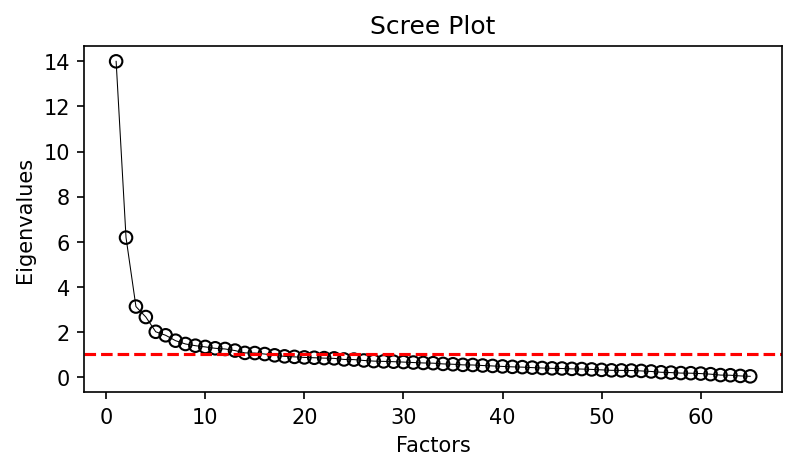

In [9]:
df.mdaviz_screeplot();

For the purposes of this demonstration, lets extract 3 factors:

In [10]:
df.mda(n_factors=3)

INFO:pybiber.biber_analyzer:Dropping 2 variable(s) with max |r| <= 0.20: ['f_61_stranded_preposition', 'f_62_split_infinitive']


And look at a summary:

In [11]:
df.mda_summary

Factor,F,df,PR(>F),Signif,R2
str,f64,list[i64],f64,str,f64
"""factor_1""",88.972607,"[14, 455]",0.0,"""*** p < 0.001""",0.73245
"""factor_2""",19.846179,"[14, 455]",0.0,"""*** p < 0.001""",0.379133
"""factor_3""",5.998623,"[14, 455]",6.4466e-11,"""*** p < 0.001""",0.155814


Now we can visualize how different text types (genres) score along each dimension. This plot shows **group means** for Factor 1—which genres cluster at the positive end vs. negative end?

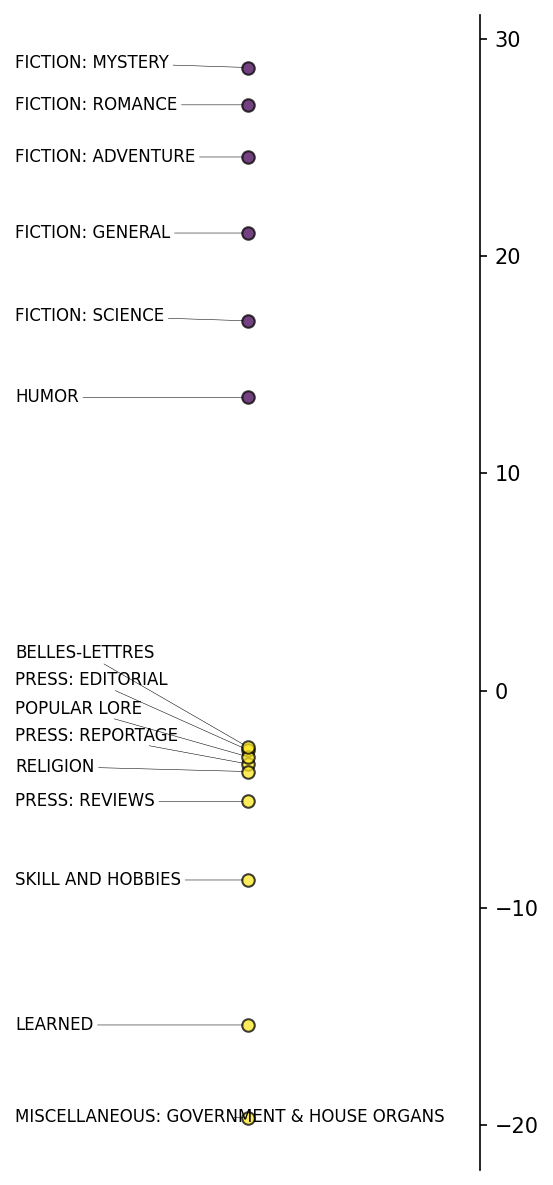

In [12]:
df.mdaviz_groupmeans(factor=1, width=4, height=10);

We can examine which linguistic features **load** heavily on each factor. High positive loadings (+) and high negative loadings (-) define the dimension's poles.

For example, if Factor 1 has high positive loadings for pronouns and contractions, and high negative loadings for nominalizations and passives, it might represent **oral vs. literate** production.

In [13]:
df.mda_loadings.sort("factor_1")

feature,factor_1,factor_2,factor_3
str,f64,f64,f64
"""f_03_present_tense""",-1.009852,-0.034924,0.942609
"""f_40_adj_attr""",-0.808102,0.150414,0.05509
"""f_14_nominalizations""",-0.777371,0.147251,-0.079733
"""f_44_mean_word_length""",-0.747481,-0.069632,-0.191333
"""f_45_conjuncts""",-0.679174,0.29295,0.157756
"""f_39_prepositions""",-0.600508,-0.070209,-0.272134
"""f_64_phrasal_coordination""",-0.522747,-0.00872,0.125395
"""f_17_agentless_passives""",-0.462271,-0.040817,-0.203729
"""f_51_demonstratives""",-0.456285,0.279224,0.110075


### 🤔 Question

Why do you think the factor loadings here don't precisely align with the factor loadings from Biber's Dimension 1 ("involved vs. informational production")?

<https://www.uni-bamberg.de/fileadmin/eng-ling/fs/Chapter_21/23DimensionsofEnglish.html>

## Case 2: DocuScope

We can apply the same MDA process using different feature sets. **DocuScope** is a rhetorical tagger that identifies over 100 categories of language use based on function and effect (not just grammar).

DocuScope categories described here: <https://docuscospacy.readthedocs.io/en/latest/docuscope.html#categories>

Examples include:
- **Reasoning** (therefore, thus, consequently)
- **Description** (blue, tall, enormous)
- **Character** (protagonist, antagonist, person names)
- **Confidence** (certainly, definitely, obviously)

**Key difference from Biber**: DocuScope focuses on rhetorical moves and semantic clusters rather than syntactic/grammatical patterns.

### Install the libraries and model

In [14]:
%%capture
!pip install docuscospacy
!pip install "en_docusco_spacy @ https://huggingface.co/browndw/en_docusco_spacy/resolve/main/en_docusco_spacy-any-py3-none-any.whl"

### Load the library

In [15]:
import docuscospacy as ds

### Initiate a model instance

In [16]:
nlp_ds = spacy.load("en_docusco_spacy")

### Parse the data

In [17]:
ds_tokens = ds.docuscope_parse(bc, nlp_model=nlp_ds, n_process=4)

/Users/davidwestbrown/miniconda3/envs/moodswing_env/lib/python3.13/site-packages/docuscospacy/validation.py:259: PerformanceWarning: Found 2 very long documents (>100k characters) in CorpusProcessor. These may be automatically chunked during processing.
  warnings.warn(


Performance: Corpus processing completed in 29.72s


### Format the data

In [18]:
dfm_ds = ds.tags_dtm(ds_tokens, count_by="ds") # create dfm
dfm_ds = ds.dtm_weight(dfm_ds) # normalize counts
dfm_ds = dfm_ds.drop("Untagged") # drop Untagged column
dfm_ds = dfm_ds.join(brown_corpus.select("doc_id", "text_type"), on="doc_id")

In [13]:
dfm_ds.head()

doc_id,Description,Character,Narrative,AcademicTerms,Negative,InformationExposition,Positive,InformationTopics,ForceStressed,MetadiscourseCohesive,PublicTerms,InformationPlace,Interactive,Strategic,Reasoning,InformationStates,ConfidenceHedged,InformationReportVerbs,FirstPerson,ConfidenceHigh,InformationChange,Future,Contingent,Inquiry,Updates,MetadiscourseInteractive,Citation,Facilitate,AcademicWritingMoves,Uncertainty,InformationChangePositive,Responsibility,CitationAuthority,InformationChangeNegative,ConfidenceLow,CitationHedged,text_type
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""A01""",0.045595,0.098583,0.078866,0.040665,0.032039,0.04313,0.022797,0.030807,0.014171,0.014171,0.064695,0.03512,0.0191,0.024646,0.007394,0.009858,0.004313,0.012939,0.002465,0.001232,0.006161,0.014787,0.001232,0.001848,0.004313,0.001232,0.00801,0.010474,0.003697,0.002465,0.003697,0.000616,0.002465,0.0,0.0,0.0,"""PRESS: REPORTAGE"""
"""A02""",0.048164,0.099338,0.074052,0.054184,0.033113,0.045154,0.015653,0.058399,0.005418,0.010837,0.040939,0.058399,0.013847,0.012041,0.00602,0.009633,0.006623,0.008429,0.00301,0.002408,0.006623,0.010235,0.00301,0.001204,0.00301,0.000602,0.001806,0.011439,0.001204,0.000602,0.001204,0.005418,0.000602,0.0,0.0,0.0,"""PRESS: REPORTAGE"""
"""A03""",0.044578,0.090964,0.086747,0.055422,0.031325,0.076506,0.016265,0.051807,0.014458,0.016265,0.042169,0.016265,0.019277,0.028916,0.007229,0.004819,0.00241,0.016867,0.0,0.004819,0.005422,0.010241,0.00241,0.003012,0.003012,0.001807,0.004819,0.004819,0.003012,0.0,0.004819,0.003614,0.001205,0.000602,0.0,0.0,"""PRESS: REPORTAGE"""
"""A04""",0.040473,0.088418,0.074097,0.034869,0.064134,0.030511,0.02802,0.023661,0.023039,0.011831,0.064757,0.044832,0.010585,0.016812,0.00934,0.013699,0.008095,0.006227,0.0,0.007472,0.006849,0.00934,0.007472,0.007472,0.008095,0.000623,0.004981,0.004981,0.002491,0.000623,0.005604,0.001868,0.000623,0.001868,0.0,0.0,"""PRESS: REPORTAGE"""
"""A05""",0.051034,0.096899,0.094315,0.056202,0.021964,0.027132,0.023256,0.040698,0.020026,0.009044,0.05491,0.02584,0.020026,0.020026,0.007106,0.010336,0.00969,0.020672,0.00323,0.005168,0.004522,0.01292,0.00646,0.007752,0.003876,0.00323,0.009044,0.007752,0.002584,0.0,0.002584,0.002584,0.002584,0.0,0.0,0.0,"""PRESS: REPORTAGE"""


### Analyze and extract factors

In [19]:
df_ds = pb.BiberAnalyzer(dfm_ds, id_column=True)

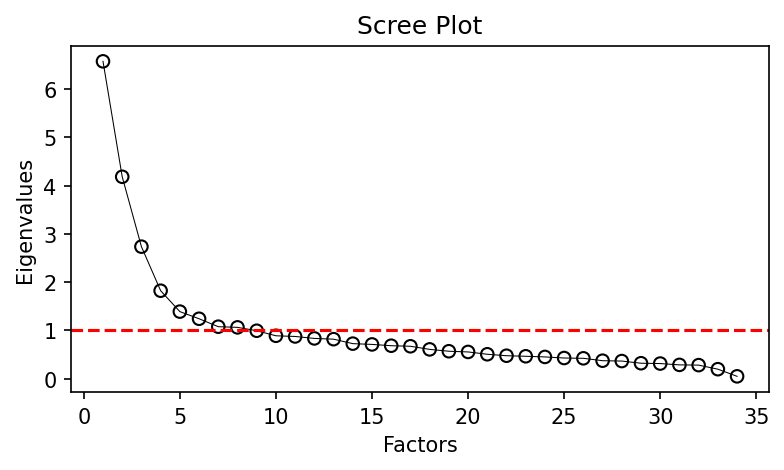

In [20]:
df_ds.mdaviz_screeplot();

In [21]:
df_ds.mda(n_factors=3)

INFO:pybiber.biber_analyzer:Dropping 2 variable(s) with max |r| <= 0.20: ['InformationChangeNegative', 'ConfidenceLow']


In [22]:
df_ds.mda_summary

Factor,F,df,PR(>F),Signif,R2
str,f64,list[i64],f64,str,f64
"""factor_1""",66.570752,"[14, 455]",0.0,"""*** p < 0.001""",0.671952
"""factor_2""",10.974881,"[14, 455]",0.0,"""*** p < 0.001""",0.252442
"""factor_3""",19.913485,"[14, 455]",0.0,"""*** p < 0.001""",0.379931


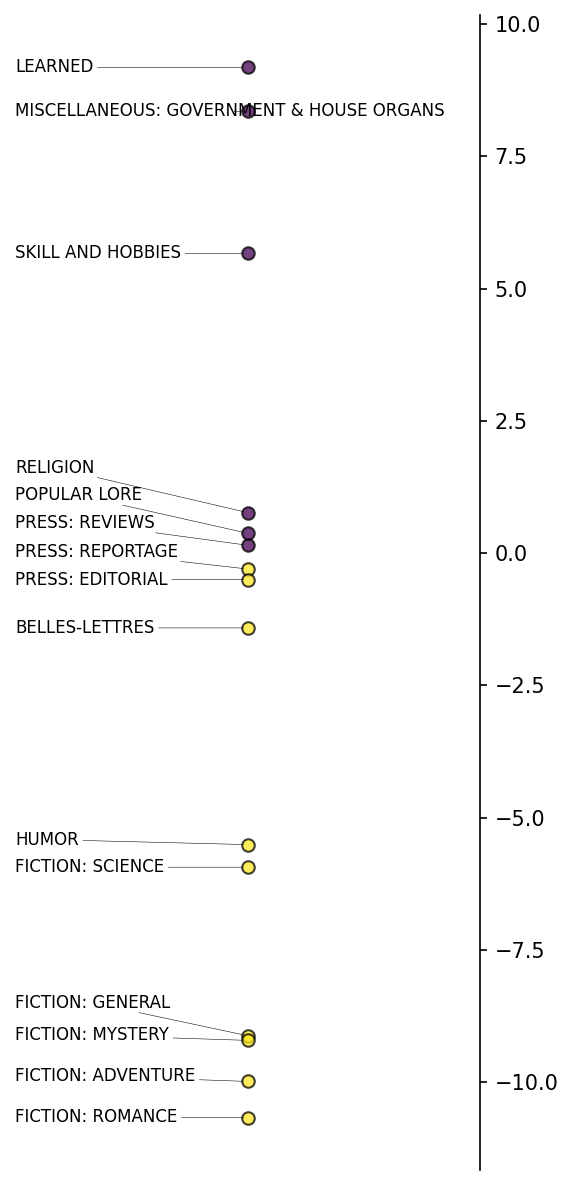

In [23]:
df_ds.mdaviz_groupmeans(factor=1, width=4, height=10);

### 🤔 Question

How would you compare the explantory power of Biber's syntactic/functional categories vs. DocuScope's rhetorical categories?

To read more about these comparisions, see:


*   <https://www.jbe-platform.com/content/books/9789027249807-scl.109.03dej>
*   <https://cmu.primo.exlibrisgroup.com/permalink/01CMU_INST/8lb6it/cdi_walterdegruyter_books_10_1075_scl_109_03dej>



## Principal Component Analysis (PCA)

**PCA** is another dimension reduction technique, more common in data science than MDA in linguistics. Both reduce many variables to fewer components, but with key differences:

**MDA (Factor Analysis)**:
- Assumes latent factors **cause** observed variables
- Focuses on **shared variance** among variables
- Better for interpretive work (factors have functional interpretations)

**PCA**:
- No causal assumptions—just finds variance patterns
- Focuses on **total variance** (including unique variance)
- Better for data compression and predictive modeling

For text analysis, MDA is often preferred because it produces **interpretable dimensions** (e.g., "involved vs. informational"). PCA components are harder to label functionally.

Resources:
- <https://medium.com/@noorulhudaajmal12/understanding-principal-component-analysis-pca-f831f0ce08c5>
- <https://www.ibm.com/think/topics/principal-component-analysis>

**pybiber** includes a simple wrapper for scikit-learn's PCA functions.

In [24]:
df_ds.pca()

You can access the coordiates of the documents across PCs:

In [25]:
df_ds.pca_coordinates.head()

doc_id,doc_cat,PC_1,PC_2,PC_3,…,PC_32,PC_33,PC_34,PC_35,PC_36
str,str,f64,f64,f64,…,f64,f64,f64,f64,f64
"""A01""","""PRESS: REPORTAGE""",1.57526,-3.270218,3.066812,…,0.84184,1.301843,-0.25709,-0.020449,-0.026313
"""A02""","""PRESS: REPORTAGE""",1.449488,-4.351637,2.754133,…,-0.280828,-0.16348,0.140084,-0.307546,-0.145099
"""A03""","""PRESS: REPORTAGE""",2.437446,-3.697229,1.425631,…,0.131053,0.707115,0.843352,-0.203689,0.106494
"""A04""","""PRESS: REPORTAGE""",0.730532,-0.63064,3.456141,…,0.335573,0.015769,-0.212676,-0.014291,0.037671
"""A05""","""PRESS: REPORTAGE""",2.545739,-1.230044,2.872118,…,0.684767,0.74039,-0.048715,0.253798,-0.078039


You could make a scatter plot using those coordinates. There is also a convenience function for plotting group means across PC's:

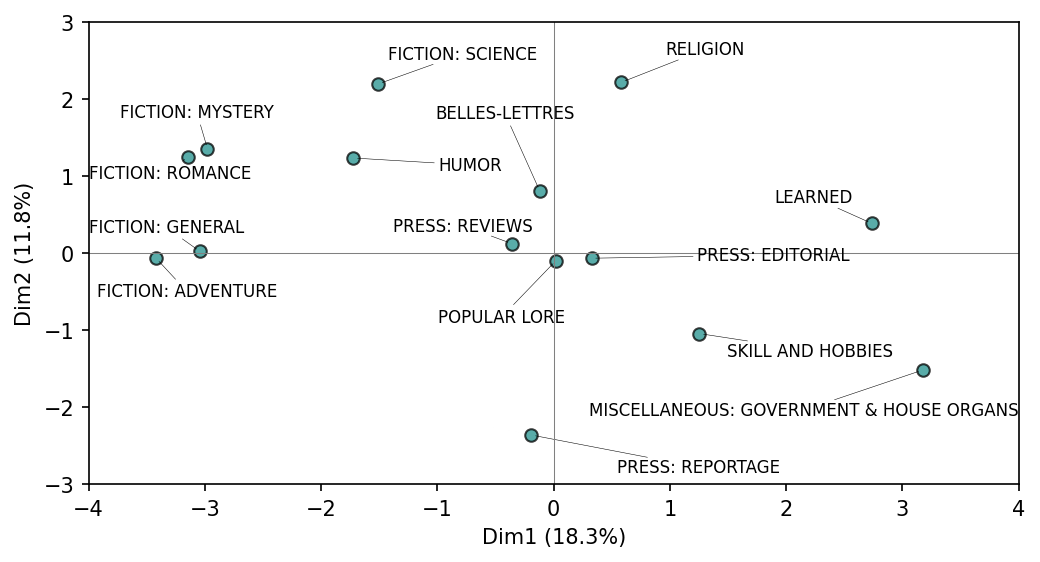

In [26]:
df_ds.pcaviz_groupmeans();

And plot the variables contributing the a given PC, where that contribution is [greater than the mean contribution](https://www.sthda.com/english/wiki/fviz-contrib-quick-visualization-of-row-column-contributions-r-software-and-data-mining):

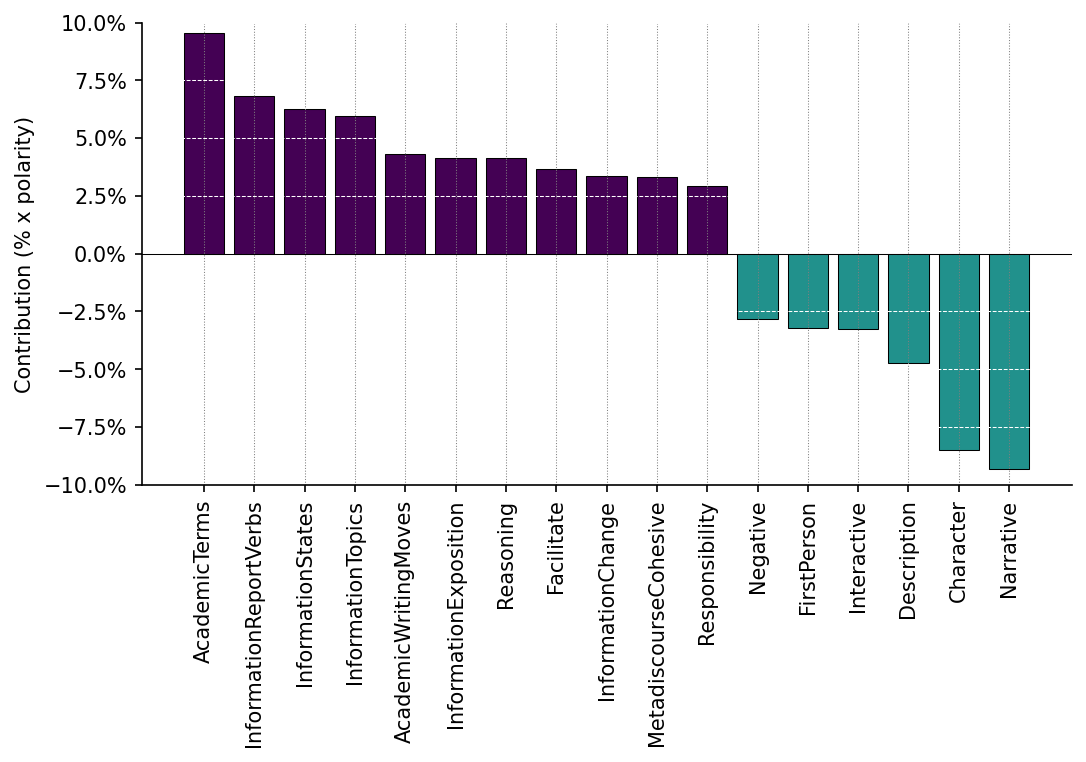

In [27]:
df_ds.pcaviz_contrib(pc=1);

## Discussion Questions

1. **Factor Interpretation**: Examine the feature loadings for Factor 1 in the Biber analysis. Can you assign a functional label (e.g., "narrative vs. expository," "oral vs. literate")? What linguistic theory supports this interpretation?

2. **Scree Plot Decisions**: The scree plot shows a gradual decline rather than a clear "elbow." How would you justify extracting 3 factors vs. 5 factors? What are the trade-offs?

3. **Biber vs. DocuScope**: Compare the dimensions extracted from Biber's syntactic features vs. DocuScope's rhetorical categories. Which better distinguishes genres in the Brown Corpus? Why might one be more effective than the other?

4. **Genre Clustering**: Look at the group means plots. Do "learned" genres (scientific writing, academic prose) cluster at one end of a dimension while "popular" genres (fiction, adventure) cluster at the other? What does this reveal about register variation?

5. **Stability Across Taggers**: Run MDA on both Biber and DocuScope features for the same corpus. Do similar dimensions emerge (e.g., a "narrative" dimension in both)? What does this suggest about underlying register variation?

6. **Factor vs. Principal Component**: Compare the MDA and PCA results for DocuScope features. Do the components align with the factors? Which produces more interpretable dimensions for humanities research?

## Experimentation Ideas

1. **Vary the number of factors**: Extract 2, 3, 4, and 5 factors from the same data. At what point do dimensions become too granular or overlap conceptually?

2. **Genre-specific analysis**: Subset the Brown Corpus to only fiction genres (mystery, science fiction, romance). Do the same dimensions emerge, or do new sub-genre distinctions appear?

3. **Feature selection**: Instead of using all 67 Biber features, select only the top 20 most variable features. How does this affect the extracted dimensions?

4. **Custom feature sets**: Create a hybrid feature set combining Biber grammatical features (e.g., passives, nominalizations) with DocuScope rhetorical features (e.g., Reasoning, Confidence). Do new dimensions emerge?

5. **Temporal analysis**: If you have access to a diachronic corpus (e.g., COHA), apply MDA to different time periods. Do dimension structures remain stable, or do register distinctions shift over time?

6. **Cross-corpus validation**: Apply the same MDA model to a different corpus (e.g., British National Corpus). Do genres cluster similarly along the extracted dimensions?